In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import math

In [2]:
# Load audio file using librosa
# You can replace this with your audio file
audio_file = librosa.example('trumpet')
y, sr = librosa.load(audio_file)

In [3]:
def calculate_mfcc(y, sr, n_mfcc=13):
    frame_size = int(sr * 0.025)  # 25ms frame size
    frame_stride = int(sr * 0.01)  # 10ms frame stride
    num_frames = 1 + int((len(y) - frame_size) / frame_stride)

    # Pre-emphasis
    pre_emphasis = 0.97
    emphasized_signal = [y[0]] + [y[i] - pre_emphasis * y[i - 1]
                                  for i in range(1, len(y))]

    # Hamming window
    hamming_window = [
        0.54 - 0.46 * math.cos(2 * math.pi * i / (frame_size - 1)) for i in range(frame_size)]

    # MFCCs
    mfccs = []
    for frame in range(num_frames):
        start = frame * frame_stride
        end = start + frame_size

        frame_signal = emphasized_signal[start:end]

        if len(frame_signal) < frame_size:
            frame_signal += [0] * (frame_size - len(frame_signal))

        frame_signal = [s * w for s, w in zip(frame_signal, hamming_window)]

        # FFT
        spectrum = [abs(sum(frame_signal[i] * math.cos(2 * math.pi * j * i / frame_size)
                        for i in range(frame_size))) for j in range(frame_size)]

        # Mel filterbank
        mel_filterbank = [list(map(lambda hz: max(0, 1 - abs(hz - (mel * (sr / 2)) / (
            sr / frame_size))), range(frame_size))) for mel in range(n_mfcc)]

        # Log mel spectrum with epsilon to avoid math domain error
        epsilon = 1e-10
        mel_spectrum = [math.log(max(epsilon, sum(spectrum[i] * mel_filterbank[mel][i]
                                 for i in range(frame_size)))) for mel in range(n_mfcc)]

        mfccs.append(mel_spectrum)

    return mfccs


In [4]:
# Compute MFCCs
mfccs = calculate_mfcc(y, sr)

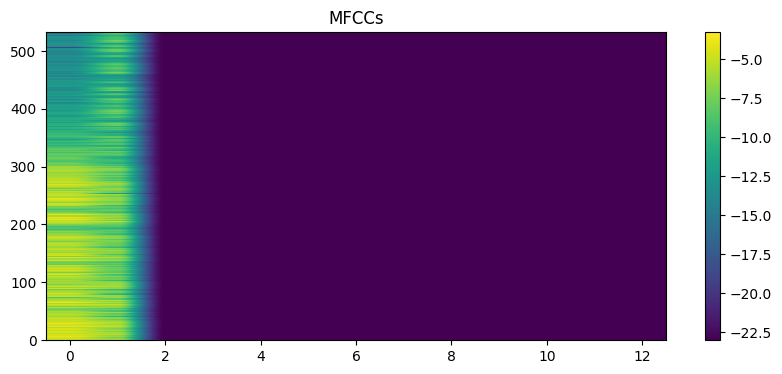

In [5]:
# Display the MFCCs
plt.figure(figsize=(10, 4))
plt.imshow(mfccs, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar()
plt.title('MFCCs')
plt.show()